In [19]:
import pandas as pd
import os

# Phần này thêm cột mới thay thế cột category trước đó của raw dataset
# thay tên file csv vào file path để thay thế giá trị cho file
#file_path = './data/vietnamese_tiki_products_women_shoes.csv'

df = pd.read_csv(file_path)

# Thêm một cột mới với giá trị tự cho
#df['category'] = 'Giày dép nữ'

# Lưu csv
df.to_csv(file_path, index=False)

In [21]:
# Phần code này để gộp các file lại với nhau và bỏ các cột không cần thiết
csv_folder_path = './data'

# Lấy danh sách tất cả các file CSV trong thư mục
csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

# Tạo một danh sách để lưu trữ các DataFrame
dataframes = []

# Đọc từng file CSV và thêm vào danh sách DataFrame
for file in csv_files:
    file_path = os.path.join(csv_folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Ghép tất cả các DataFrame lại với nhau
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df = combined_df.drop(columns=['Unnamed: 0','id','description'])

# Lưu DataFrame đã ghép thành một file CSV mới
combined_df.to_csv('./data/combined_file.csv', index=False)

Missing Values:
fulfillment_type    1
brand               2
dtype: int64

Dữ liệu sau khi xử lý missing values: (41603, 16)

Gía trị unique ở mỗi cột:
name                38281
original_price       3311
price                3860
fulfillment_type        4
brand                 824
review_count          219
rating_average         33
favourite_count         1
pay_later               2
current_seller       3807
date_created         1756
number_of_images       44
vnd_cashback         2496
has_video               2
category                6
quantity_sold         600
dtype: int64

Số dòng bị trùng:
222

Dữ liệu sau khi loại bỏ dòng trùng: (41381, 16)

Summary Statistics:
       original_price         price  review_count  rating_average  \
count    4.138100e+04  4.138100e+04  41381.000000    41381.000000   
mean     3.047833e+05  2.721269e+05      3.126821        1.388031   
std      8.522345e+05  7.634055e+05     18.272673        2.108053   
min      0.000000e+00  0.000000e+00      0.000000  

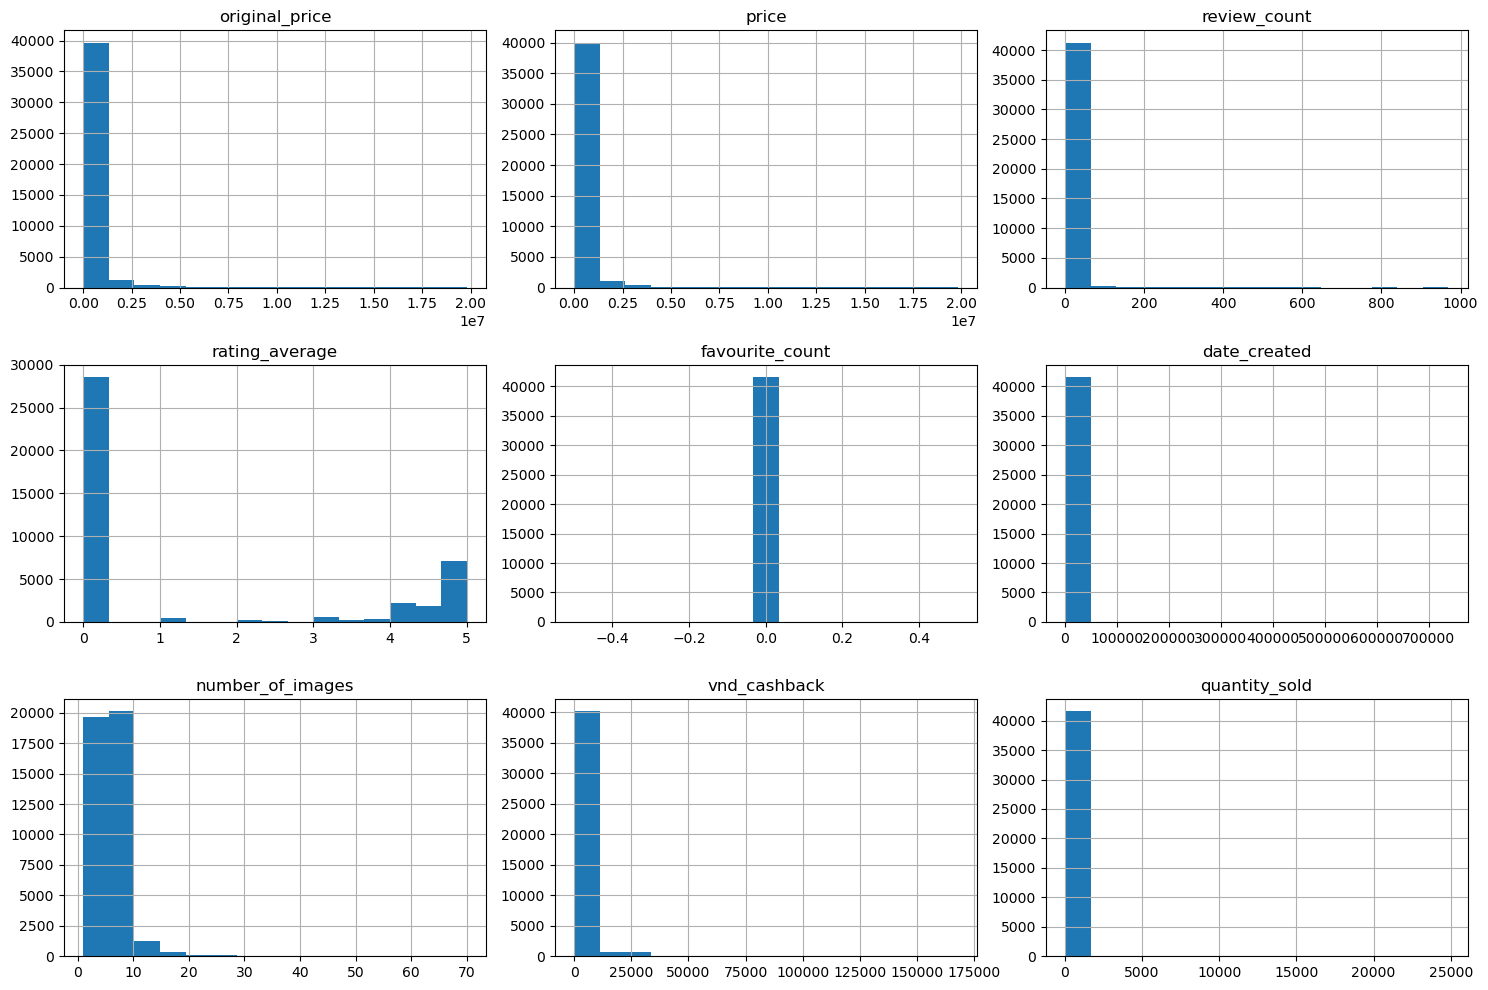


Đã lưu dữ liệu tiền xử lý vào 'cleaned_dataset.csv'


In [4]:
import pandas as pd
import numpy as np
# Đọc dữ liệu từ file CSV 
df = pd.read_csv('./data/combined_file.csv')

# Kiểm tra và hiển thị các giá trị thiếu
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Thay thế các giá trị thiếu bằng mode của cột tương ứng
def replace_missing_with_mode(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
    return df

df_cleaned = replace_missing_with_mode(df)
print(f"\nDữ liệu sau khi xử lý missing values: {df_cleaned.shape}")

# Kiểm tra các giá trị duy nhất trong mỗi cột
unique_values = df.nunique()
print("\nGía trị unique ở mỗi cột:")
print(unique_values)


# Kiểm tra và xóa các giá trị trùng lặp
duplicates = df_cleaned.duplicated().sum()
print("\nSố dòng bị trùng:")
print(duplicates)

df_cleaned = df_cleaned.drop_duplicates()
print(f"\nDữ liệu sau khi loại bỏ dòng trùng: {df_cleaned.shape}")

# Thống kê cơ bản về dữ liệu
summary_statistics = df_cleaned.describe()
print("\nSummary Statistics:")
print(summary_statistics)

def plot_histograms(df):
    df.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

plot_histograms(df)
# Lưu DataFrame đã làm sạch ra file CSV mới
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("\nĐã lưu dữ liệu tiền xử lý vào 'cleaned_dataset.csv'")

In [6]:
print(df_cleaned.head(5))

                                                name  original_price  price  \
0                                    tang đeo cài áo           10000  10000   
1                  Bộ Móc May Áo Ngực Loại 2 Móc Cài            7000   7000   
2  Miếng Nối Rộng Tăng Size Áo Ngực 4 Móc Cài-Móc...            8000   8000   
3  GOTI - Ghim Cài Áo Hình Chiếc Lá Trắng Đính Ng...           15000  13500   
4                  Vỉ nút bấm áo dài 36 nút hiệu POP           13600  13600   

  fulfillment_type brand  review_count  rating_average  favourite_count  \
0         dropship   OEM             2             5.0                0   
1         dropship   OEM             1             4.0                0   
2         dropship   OEM             1             5.0                0   
3         dropship  GOTI            22             4.8                0   
4         dropship   OEM             8             5.0                0   

   pay_later                      current_seller  date_created  \
0      F